# 2D ladder, some theory and practice

2D systems become a bit more complicated, but at the end of the day we end up finding very similar matrices to 1D problems. Consider a ladder, that will be infinite in the $x$-direction, but finite in the $y$ where there is only 2 sites. The Hamiltonian for our system with 5 sites in the $x$-direction is

\begin{equation}
{\bf H}=
\begin{pmatrix}
H_1 & B_{12} \\
B_{12}^{\dagger} & H_2
\end{pmatrix}
\end{equation}

where $H_i$ is now the Hamiltonian for layer $i$ in the $x$ direction, and $B_{ij}$ is the coupling between layers $i$ and $j$.

We now would like to solve ${\bf H}\psi = E\psi$, where
$$
\psi=u_{k_1}(x)e^{ik_1x} + u_{k_2}(x)e^{ik_2x}.
$$
Plugging this form into the TISE, we get

\begin{equation}
{\bf H}=
\begin{pmatrix}
 H_1 &  B_{12} \\
 B_{12}^{\dagger} & H_2
\end{pmatrix}
\begin{pmatrix}
u_{k_1}(x)e^{ik_1x} \\
u_{k_2}(x)e^{ik_2x}
\end{pmatrix}=
E\begin{pmatrix}
u_{k_1}(x)e^{ik_1x} \\
u_{k_2}(x)e^{ik_2x}
\end{pmatrix}
\end{equation}

Multiplying on the LHS by $\psi^*$ and integrating over all space, we find
\begin{eqnarray}
\int dx~
\begin{pmatrix}
u_{k_1}(x)^*e^{-ik_1x} &
u_{k_2}(x)^*e^{-ik_2x}
\end{pmatrix}
\begin{pmatrix}
H_1 & B_{12} \\
B_{12}^{\dagger} & H_2
\end{pmatrix}
\begin{pmatrix}
u_{k_1}(x)e^{ik_1x} \\
u_{k_2}(x)e^{ik_2x}
\end{pmatrix}&=&
\int dx
\begin{pmatrix}
u_{k_1}(x)^*e^{-ik_1x} &
u_{k_2}(x)^*e^{-ik_2x}
\end{pmatrix}
E\begin{pmatrix}
u_{k_1}(x)e^{ik_1x} \\
u_{k_2}(x)e^{ik_2x}
\end{pmatrix}\\
\begin{pmatrix}
\langle u_{k_1}(x)^*e^{-ik_1x} |H_1|u_{k_1}(x)e^{ik_1x}\rangle & \langle u_{k_1}(x)^*e^{-ik_1x}| B_{12}|u_{k_2}(x)e^{ik_2x}\rangle \\
\langle u_{k_2}(x)^*e^{-ik_2x} |B_{12}^{\dagger}|u_{k_1}(x)e^{ik_1x}\rangle & \langle u_{k_2}(x)^*e^{-ik_2x} |  H_2|u_{k_2}(x)e^{ik_2x}\rangle
\end{pmatrix}&=&
E\begin{pmatrix}
\langle u_{k_1}(x)^*e^{-ik_1x} |u_{k_1}(x)e^{ik_1x}\rangle & \langle u_{k_1}(x)^*e^{-ik_1x} |u_{k_2}(x)e^{ik_2x}\rangle \\
\langle u_{k_2}(x)^*e^{-ik_2x} |u_{k_1}(x)e^{ik_1x}\rangle & \langle u_{k_2}(x)^*e^{-ik_2x} |u_{k_2}(x)e^{ik_2x}\rangle
\end{pmatrix}\\
\begin{pmatrix}
\langle u_{k_1}(x)^*e^{-ik_1x} |H_1|u_{k_1}(x)e^{ik_1x}\rangle & \langle u_{k_1}(x)^*e^{-ik_1x}| B_{12}|u_{k_2}(x)e^{ik_2x}\rangle \\
\langle u_{k_2}(x)^*e^{-ik_2x} |B_{12}^{\dagger}|u_{k_1}(x)e^{ik_1x}\rangle & \langle u_{k_2}(x)^*e^{-ik_2x} | H_2|u_{k_2}(x)e^{ik_2x}\rangle
\end{pmatrix}-E{\bf I}&=&0
\end{eqnarray}
Let's now consider the diagonal elements, if 
$$
H_n = -\frac{\hbar^2}{2m}\frac{\partial^2}{\partial_x^2} + V(x)
$$
then, discretizing this gives
$$
H_n|u_{k_i}e^{ik_ix}\rangle = -\frac{\hbar^2}{2m\Delta^2}(u_{k_i}^{(n + 1)}e^{ik_i\Delta(n+1)} - 2u_{k_i}^{(n)}e^{ik_i\Delta n} + u_{k_i}^{(n-1)}e^{ik_i\Delta(n-1)}) + V(n)u_{k_i}^{(n)}e^{ik_i\Delta n}
$$
which in turn yields
$$\langle u_{k_i}^{(m)}e^{ik_i\Delta m} | H_n | u_{k_i}^{(n)}e^{ik_i\Delta n}\rangle =-\frac{\hbar^2}{2m\Delta^2}(\delta_{n+1,m} - 2\delta_{n,m} + \delta_{n-1, m}) + V(n)\delta_{n,m}
$$
which is precisely what we had for a 1D chain. In matrix form, we obtain 
\begin{equation}
\begin{pmatrix}
2t + V_{11} & -t & 0 & 0 & 0\\
-t  & 2t + V_{12} & -t & 0 & 0\\
0 & -t & 2t + V_{13} & -t & 0 \\ 
0 & 0 & -t & 2t + V_{14} & -t  \\ 
0 & 0 & 0 & -t & 2t + V_{15}
\end{pmatrix}
\end{equation}

where I have defined $t=\frac{\hbar^2}{2m}$. Our total Hamiltonian matrix then becomes (thus far)
$$
\begin{pmatrix}
\begin{pmatrix}
2t + V_{12} & -t & 0 & 0 & 0\\
-t  & 2t + V_{12} & -t & 0 & 0\\
0 & -t & 2t + V_{13} & -t & 0 \\ 
0 & 0 & -t & 2t + V_{14} & -t  \\ 
0 & 0 & 0 & -t & 2t + V_{15}
\end{pmatrix} & \langle u_{k_1}(x)^*e^{-ik_1x}| B_{12}|u_{k_2}(x)e^{ik_2x}\rangle\\
\langle u_{k_2}(x)^*e^{-ik_2x} |B_{12}^{\dagger}|u_{k_1}(x)e^{ik_1x}\rangle  & \begin{pmatrix}
2t + V_{21} & -t & 0 & 0 & 0\\
-t  & 2t + V_{22} & -t & 0 & 0\\
0 & -t & 2t + V_{23} & -t & 0 \\ 
0 & 0 & -t & 2t + V_{24} & -t  \\ 
0 & 0 & 0 & -t & 2t + V_{25}
\end{pmatrix}\\
\end{pmatrix}-E{\bf I} = 0
$$

Now writing out the off-diagonal elements, let's consider the case where only neighboring sites have interactions such that
$$
B_{12} = \left\{\begin{matrix} -t & \text{if }

In [32]:
import kwant 
# For plotting
from matplotlib import pyplot
import numpy as np
%matplotlib inline

In [33]:
def make_system(a=1, t=1.0, W=2, L=5):
    # Start with an empty tight-binding system and a single square lattice. 
    # `a` is the lattice constant (by default set to 1 for simplicity.
    lat = kwant.lattice.square(a)

    syst = kwant.Builder()

    syst[(lat(x, y) for x in range(L) for y in range(W))] = 4 * t

    syst[lat.neighbors()] = -t

    lead = kwant.Builder(kwant.TranslationalSymmetry((-a, 0)))
    lead[(lat(0, j) for j in range(W))] = 4 * t
    lead[lat.neighbors()] = -t
    syst.attach_lead(lead)
    syst.attach_lead(lead.reversed())
    return syst

In [34]:
def plot_conductance(syst, energies): # Compute conductance
    data = []
    for energy in energies:
        smatrix = kwant.smatrix(syst, energy)
        data.append(smatrix.transmission(0, 1))
    pyplot.figure()
    pyplot.plot(energies, data)
    pyplot.xlabel("energy [t]")
    pyplot.ylabel("conductance [$e^2/h$]")
    pyplot.show()

/Users/b295319/anaconda3/lib/python3.6/site-packages/kwant/linalg/lll.py:103: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coefs = np.linalg.lstsq(vecs_orig.T, vecs.T)[0]
/Users/b295319/anaconda3/lib/python3.6/site-packages/kwant/linalg/lll.py:144: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  center_coords = np.array(np.round(np.linalg.lstsq(basis.T, vec)[0]), int)


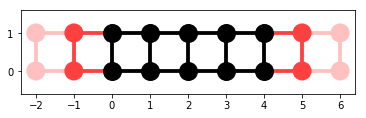

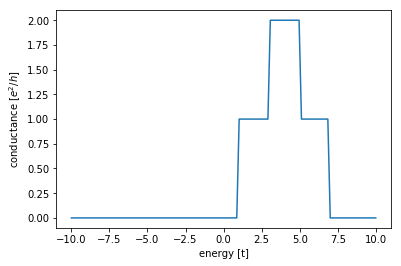

In [35]:
syst = make_system()
# Check that the system looks as intended.
kwant.plot(syst)
# Finalize the system.
syst = syst.finalized()
# We should see conductance steps.
plot_conductance(syst, energies=np.linspace(-10,10,128))